In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# 1. Loading and Preprocessing
# Load dataset
data = pd.read_csv('CarPrice_Assignment.csv')  # Use raw string literal to avoid unicode escape issues


In [12]:
# Inspect the data
print(data.info())
print(data.describe())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [14]:
# Drop unnecessary columns and handle categorical variables
# Assuming 'car_ID' is not needed
data.drop('car_ID', axis=1, inplace=True)

In [16]:
# Encode categorical variables
categorical_cols = data.select_dtypes(include=['object']).columns

data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)


In [18]:
# Split features and target
target = 'price'
X = data.drop(target, axis=1)
y = data[target]


In [20]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [30]:
# 2. Model Implementation
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluate
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    results[name] = {'R-squared': r2, 'MSE': mse, 'MAE': mae}

In [32]:
# Display results
results_df = pd.DataFrame(results).T
print(results_df)

                             R-squared           MSE           MAE
Linear Regression        -3.584911e+26  2.830073e+34  8.296015e+16
Decision Tree             8.558977e-01  1.137602e+07  2.200142e+03
Random Forest             9.533492e-01  3.682803e+06  1.367316e+03
Gradient Boosting         9.307984e-01  5.463056e+06  1.696863e+03
Support Vector Regressor -1.020658e-01  8.700151e+07  5.707013e+03


In [36]:
# 3. Feature Importance Analysis
# Feature importance from Random Forest
rf_model = models['Random Forest']
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)


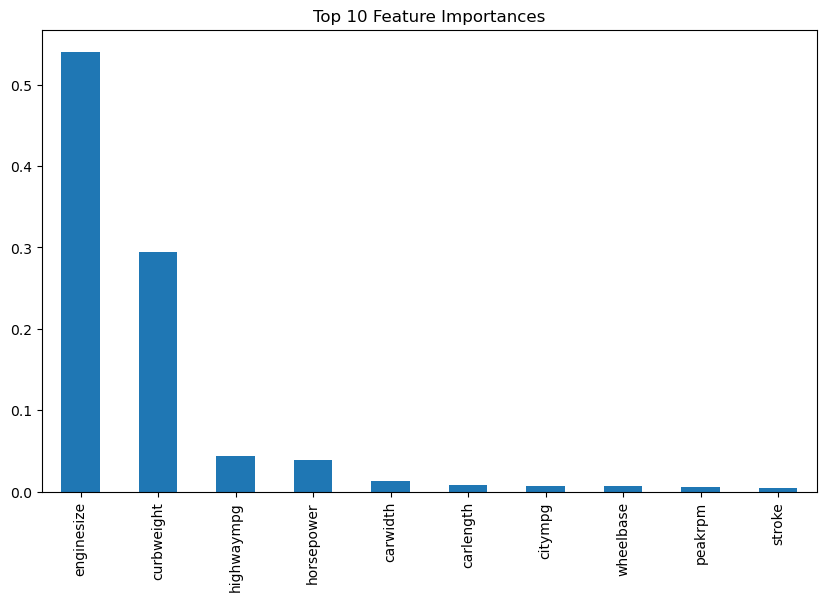

In [38]:
# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importances.head(10).plot(kind='bar')
plt.title('Top 10 Feature Importances')
plt.show()


In [45]:
# 4. Hyperparameter Tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# Evaluate tuned model
y_pred_tuned = best_model.predict(X_test)
r2_tuned = r2_score(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)

print("Best Model Performance:")
print(f"R-squared: {r2_tuned}")
print(f"MSE: {mse_tuned}")
print(f"MAE: {mae_tuned}")


Best Model Performance:
R-squared: 0.9391398898153419
MSE: 4804541.809155916
MAE: 1524.2910039660053
